In [10]:
##this code takes data which was averaged over repetitions
## -- outdated -- but figures can still be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/allHandData_2911.csv')
data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/PupilDiameter/Combined_PupilDiameter_noav_1904.csv')
df = pd.DataFrame(data2load)
#df = pd.DataFrame(data2load).drop(['Timepoint','ID'], axis=1)
df


,Unnamed: 0,CM1,CL1,CR1,EM1,EL1,ER1,CM2,CL2,CR2,EM2,EL2,ER2,Participant
0,0,0.019631,-0.000302,-0.002017,0.023907,-0.026451,-0.014968,-0.055221,0.017097,0.014433,-0.004583,-0.016461,-0.006779,2
1,1,0.019654,-0.000275,-0.001955,0.023936,-0.026469,-0.015040,-0.055284,0.017177,0.014327,-0.004537,-0.016444,-0.006849,2
2,2,0.019677,-0.000248,-0.001894,0.024012,-0.026486,-0.015111,-0.055346,0.017257,0.014240,-0.004569,-0.016427,-0.006918,2
3,3,0.019699,-0.000221,-0.001814,0.024080,-0.026504,-0.015183,-0.055409,0.017345,0.014154,-0.004601,-0.016410,-0.007005,2
4,4,0.019722,-0.000199,-0.001723,0.024148,-0.026521,-0.015252,-0.055472,0.017433,0.014068,-0.004633,-0.016393,-0.007093,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85795,3295,0.061348,0.133111,0.182574,-0.188672,-0.090320,0.096873,-0.048597,0.031675,0.191436,-0.039476,0.003347,-0.028947,30
85796,3296,0.061348,0.133111,0.182574,-0.188698,-0.090320,0.096903,-0.048597,0.031675,0.191457,-0.039518,0.003347,-0.028947,30
85797,3297,0.061348,0.133111,0.182574,-0.188723,-0.090320,0.096932,-0.048597,0.031675,0.191457,-0.039560,0.003347,-0.028947,30
85798,3298,0.061348,0.133111,0.182574,-0.188749,-0.090320,0.096961,-0.048597,0.031675,0.191457,-0.039603,0.003347,-0.028947,30


In [11]:
df=df.rename(columns={'Unnamed: 0':'Timepoint', 'Participant':'ID'})
df

,Timepoint,CM1,CL1,CR1,EM1,EL1,ER1,CM2,CL2,CR2,EM2,EL2,ER2,ID
0,0,0.019631,-0.000302,-0.002017,0.023907,-0.026451,-0.014968,-0.055221,0.017097,0.014433,-0.004583,-0.016461,-0.006779,2
1,1,0.019654,-0.000275,-0.001955,0.023936,-0.026469,-0.015040,-0.055284,0.017177,0.014327,-0.004537,-0.016444,-0.006849,2
2,2,0.019677,-0.000248,-0.001894,0.024012,-0.026486,-0.015111,-0.055346,0.017257,0.014240,-0.004569,-0.016427,-0.006918,2
3,3,0.019699,-0.000221,-0.001814,0.024080,-0.026504,-0.015183,-0.055409,0.017345,0.014154,-0.004601,-0.016410,-0.007005,2
4,4,0.019722,-0.000199,-0.001723,0.024148,-0.026521,-0.015252,-0.055472,0.017433,0.014068,-0.004633,-0.016393,-0.007093,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85795,3295,0.061348,0.133111,0.182574,-0.188672,-0.090320,0.096873,-0.048597,0.031675,0.191436,-0.039476,0.003347,-0.028947,30
85796,3296,0.061348,0.133111,0.182574,-0.188698,-0.090320,0.096903,-0.048597,0.031675,0.191457,-0.039518,0.003347,-0.028947,30
85797,3297,0.061348,0.133111,0.182574,-0.188723,-0.090320,0.096932,-0.048597,0.031675,0.191457,-0.039560,0.003347,-0.028947,30
85798,3298,0.061348,0.133111,0.182574,-0.188749,-0.090320,0.096961,-0.048597,0.031675,0.191457,-0.039603,0.003347,-0.028947,30


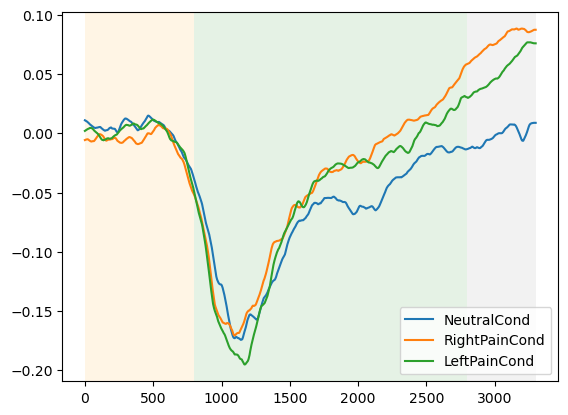

In [12]:
#these need some averaging
avdf = df.groupby(['Timepoint']).mean().drop('ID',axis=1)

avdf['CM'] = avdf[['CM1', 'CM2']].mean(axis=1)
avdf['CR'] = avdf[['CR1', 'CR2']].mean(axis=1)
avdf['CL'] = avdf[['CL1', 'CL2']].mean(axis=1)
avdf['EM'] = avdf[['EM1', 'EM2']].mean(axis=1)
avdf['ER'] = avdf[['ER1', 'ER2']].mean(axis=1)
avdf['EL'] = avdf[['EL1', 'EL2']].mean(axis=1)

# Plotting the averages for the 'conditioning' blocks
plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 2800, color='green', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

#ax = plt.gca()
#ax.set_ylim([-3, 3])

plt.plot(avdf['CM'],label="NeutralCond")
plt.plot(avdf['CR'],label="RightPainCond")
plt.plot(avdf['CL'],label='LeftPainCond')

plt.legend(loc='lower right')
plt.show()

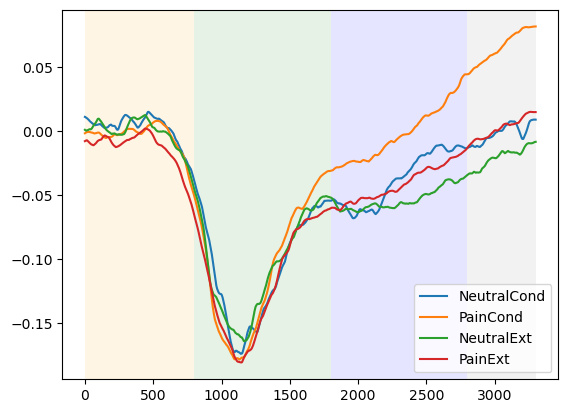

In [13]:
newdf = avdf.copy()
newdf['CP'] = newdf[['CL', 'CR']].mean(axis=1)
newdf['EP'] = newdf[['EL', 'ER']].mean(axis=1)

# Plotting the averages for the 'conditioning' blocks
plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 1800, color='green', alpha=0.10, lw=0)
plt.axvspan(1800, 2800, color='blue', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

plt.plot(newdf['CM'],label="NeutralCond")
plt.plot(newdf['CP'],label="PainCond")
plt.plot(newdf['EM'],label="NeutralExt")
plt.plot(newdf['EP'],label="PainExt")

plt.legend(loc='lower right')
plt.show()

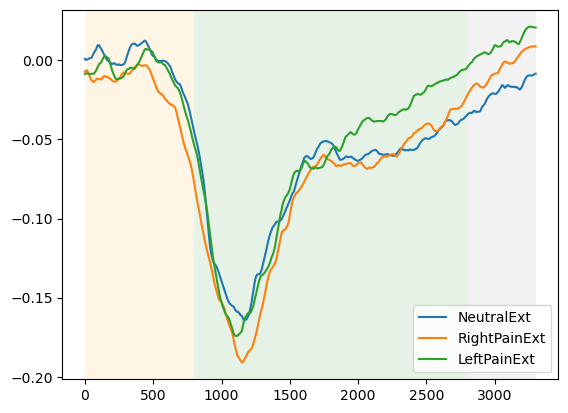

In [14]:
# Plotting the averages for the 'extinction' blocks

plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 2800, color='green', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

#ax = plt.gca()
#ax.set_ylim([-3, 3])

plt.plot(avdf['EM'],label="NeutralExt")
plt.plot(avdf['ER'],label="RightPainExt")
plt.plot(avdf['EL'],label='LeftPainExt') #looks weird - check??

plt.legend(loc='lower right')
plt.show()

In [15]:
cuedf = df.loc[df['Timepoint'].between(0,799)].groupby('ID').mean()
cuedf = cuedf.add_suffix('_cue').drop('Timepoint_cue',axis=1)
cuedf['CP_cue'] = cuedf[['CL_cue', 'CR_cue']].mean(axis=1)
cuedf['EP_cue'] = cuedf[['EL_cue', 'ER_cue']].mean(axis=1)

waitdf1 = df.loc[df['Timepoint'].between(800,1799)].groupby('ID').mean()
waitdf1 = waitdf1.add_suffix('_wait1').drop('Timepoint_wait1',axis=1)
waitdf1['CP_wait1'] = waitdf1[['CL_wait1', 'CR_wait1']].mean(axis=1)
waitdf1['EP_wait1'] = waitdf1[['EL_wait1', 'ER_wait1']].mean(axis=1)

waitdf2 = df.loc[df['Timepoint'].between(1800,2799)].groupby('ID').mean()
waitdf2 = waitdf2.add_suffix('_wait2').drop('Timepoint_wait2',axis=1)
waitdf2['CP_wait2'] = waitdf2[['CL_wait2', 'CR_wait2']].mean(axis=1)
waitdf2['EP_wait2'] = waitdf2[['EL_wait2', 'ER_wait2']].mean(axis=1)

rockdf = df.loc[df['Timepoint'].between(2800,3299)].groupby('ID').mean()
rockdf = rockdf.add_suffix('_rock').drop('Timepoint_rock',axis=1)
rockdf['CP_rock'] = rockdf[['CL_rock', 'CR_rock']].mean(axis=1)
rockdf['EP_rock'] = rockdf[['EL_rock', 'ER_rock']].mean(axis=1)

grandavdf = pd.concat([cuedf, waitdf1, waitdf2, rockdf],axis=1)

KeyError: "None of [Index(['CL_cue', 'CR_cue'], dtype='object')] are in the [columns]"

In [14]:

#grandavdf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameter_noav.csv')
#grandavdf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDir.csv')

# Making the long format export

In [17]:
# Construct the list of columns to drop
columns_to_drop = ['CL_cue', 'CR_cue', 'EL_cue', 'ER_cue', 
                   'CL_wait1', 'CR_wait1', 'EL_wait1', 'ER_wait1',
                   'CL_wait2', 'CR_wait2', 'EL_wait2', 'ER_wait2', 
                   'CL_rock', 'CR_rock', 'EL_rock', 'ER_rock']

# Drop the specified columns
grandavdfL = grandavdf.drop(columns_to_drop, axis=1)

# Print the column names after dropping
print("Column Names After Drop:")
print(grandavdfL.columns)


Column Names After Drop:
Index(['CM_cue', 'EM_cue', 'CP_cue', 'EP_cue', 'CM_wait1', 'EM_wait1',
       'CP_wait1', 'EP_wait1', 'CM_wait2', 'EM_wait2', 'CP_wait2', 'EP_wait2',
       'CM_rock', 'EM_rock', 'CP_rock', 'EP_rock'],
      dtype='object')


In [18]:
grandavdfL = grandavdfL.melt(ignore_index=False).reset_index()
grandavdfL.rename({'variable':'Condition', 'value':'Diameter'}, axis=1, inplace=True)

grandavdfL[['Condition', 'Phase']] = grandavdfL["Condition"].apply(lambda x: pd.Series(str(x).split("_")))

grandavdfL

,ID,Condition,Diameter,Phase
0,2,CM,0.006961,cue
1,3,CM,0.063896,cue
2,4,CM,0.006506,cue
3,5,CM,0.041729,cue
4,6,CM,-0.001027,cue
...,...,...,...,...
411,26,EP,0.001013,rock
412,27,EP,-0.012240,rock
413,28,EP,0.017761,rock
414,29,EP,-0.084902,rock


In [19]:

grandavdfL = grandavdfL.replace({'CM':'Conditioning_Neutral', 'EM':'Extinction_Neutral', 'CP':'Conditioning_Pain', 'EP':'Extinction_Pain'})
grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterLong.csv', index=False)
#grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDirLong.csv', index=False)

In [80]:

#grandavdfL = grandavdfL.replace({'CM':'Conditioning_Neutral', 'EM':'Extinction_Neutral', 'CP':'Conditioning_Pain', 'EP':'Extinction_Pain'})
#grandavdfL[['Condition', 'Cue']] = grandavdfL["Condition"].apply(lambda x: pd.Series(str(x).split("_")))
grandavdfL = grandavdfL.replace({'Conditioning':'1', 'Extinction':'2',
                   'cue':'1','wait1':'2','wait2':'3',
                    'rock':'4','Neutral':'0','Pain':'1'})
grandavdfL
grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterLong_Recoded_2204.csv', index=False)
#grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDirLong.csv', index=False)

In [83]:
grandavdfL = grandavdfL.reset_index()

In [84]:
grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterLong_Recoded_220.csv', index=False)


# Extinction sides data

In [51]:
#data2load = pd.read_csv('/Users/dhewitt/Data/pps/allPupilDataExt.csv')
data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/Combined_GazeDirectionExt.csv')
dfext = pd.DataFrame(data2load)
dfext=dfext.rename(columns={'Unnamed: 0':'Timepoint', 'Participant':'ID'})

data2load = pd.read_csv('/Users/dhewitt/Data/pps/tonicpainsides.csv')
sidesdf = pd.DataFrame(data2load)
dfext=dfext.join(sidesdf.set_index('ID'), on='ID')
dfext

,Timepoint,EM1,EL1,ER1,EM2,EL2,ER2,ID,B1,B2
0,0,45.497854,44.320240,43.924592,4.243265,5.514227,9.823628,2,2,1
1,1,45.503686,44.305149,43.897817,4.231374,5.423939,9.793601,2,2,1
2,2,45.511248,44.290059,43.871043,4.220279,5.332700,9.800210,2,2,1
3,3,45.526316,44.275780,43.844269,4.208317,5.243088,9.809880,2,2,1
4,4,45.542503,44.269416,43.830387,4.193549,5.153887,9.817857,2,2,1
...,...,...,...,...,...,...,...,...,...,...
85795,3295,-0.394185,0.884374,-1.689911,5.528132,5.489349,8.422852,30,1,2
85796,3296,-0.394185,0.884374,-1.689911,5.528132,5.489349,8.422852,30,1,2
85797,3297,-0.394185,0.884374,-1.689911,5.528132,5.489349,8.422852,30,1,2
85798,3298,-0.149833,0.329124,-0.007417,3.588994,2.563477,5.204519,30,1,2


In [25]:
##if it's not directional

dfext['congruent'] = dfext.loc[dfext['B1'] == 1, ['EL1', 'ER2']].mean(axis=1)
dfext['congruent'].fillna(dfext.loc[dfext['B1'] == 2, ['ER1', 'EL2']].mean(axis=1), inplace=True)
dfext['incongruent'] = dfext.loc[dfext['B1'] == 2, ['EL1', 'ER2']].mean(axis=1)
dfext['incongruent'].fillna(dfext.loc[dfext['B1'] == 1, ['ER1', 'EL2']].mean(axis=1), inplace=True)
dfext['neutral'] = dfext[['EM1','EM2']].mean(axis=1)

dfext.drop(['EL1','ER1','EL2','ER2','B1','B2', 'EM1','EM2'], axis=1, inplace=True)
dfext.reset_index(drop=True, inplace=True)

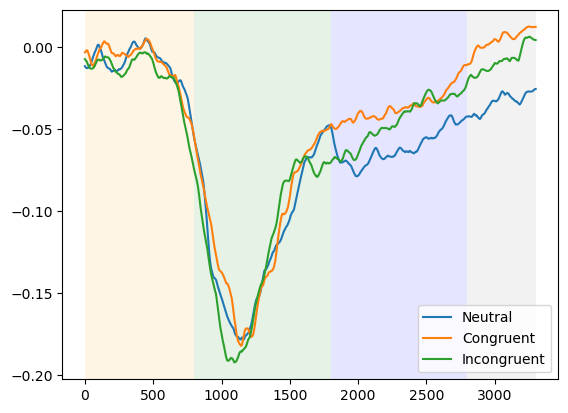

In [36]:
# Plotting the averages for the 'conditioning' blocks
avdfext = dfext.groupby(['Timepoint']).mean().drop('ID',axis=1)

plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 1800, color='green', alpha=0.10, lw=0)
plt.axvspan(1800, 2800, color='blue', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

plt.plot(avdfext['neutral'],label='Neutral')
plt.plot(avdfext['congruent'],label="Congruent")
plt.plot(avdfext['incongruent'],label="Incongruent")

#ax = plt.gca()
#ax.set_ylim([-3, 3])

plt.legend(loc='lower right')
plt.show()

In [52]:
##if it's a directional thing

dfext['Lcongruent'] = dfext.loc[dfext['B1'] == 1, ['EL1']].mean(axis=1)
dfext['Lcongruent'].fillna(dfext.loc[dfext['B1'] == 2, ['EL2']].iloc[:,0], inplace=True)
dfext['Rcongruent'] = dfext.loc[dfext['B1'] == 1, ['ER2']]
dfext['Rcongruent'].fillna(dfext.loc[dfext['B1'] == 2, ['ER1']].iloc[:,0], inplace=True)

dfext['Lincongruent'] = dfext.loc[dfext['B1'] == 2, ['EL1']]
dfext['Lincongruent'].fillna(dfext.loc[dfext['B1'] == 1, ['EL2']].iloc[:,0], inplace=True)
dfext['Rincongruent'] = dfext.loc[dfext['B1'] == 2, ['ER2']]
dfext['Rincongruent'].fillna(dfext.loc[dfext['B1'] == 1, ['ER1']].iloc[:,0], inplace=True)

dfext.drop(['EL1','ER1','EL2','ER2','B1','B2', 'EM1','EM2'], axis=1, inplace=True)
dfext.reset_index(drop=True, inplace=True)

In [53]:

dfext

,Timepoint,ID,Lcongruent,Rcongruent,Lincongruent,Rincongruent
0,0,2,5.514227,43.924592,44.320240,9.823628
1,1,2,5.423939,43.897817,44.305149,9.793601
2,2,2,5.332700,43.871043,44.290059,9.800210
3,3,2,5.243088,43.844269,44.275780,9.809880
4,4,2,5.153887,43.830387,44.269416,9.817857
...,...,...,...,...,...,...
85795,3295,30,0.884374,8.422852,5.489349,-1.689911
85796,3296,30,0.884374,8.422852,5.489349,-1.689911
85797,3297,30,0.884374,8.422852,5.489349,-1.689911
85798,3298,30,0.329124,5.204519,2.563477,-0.007417


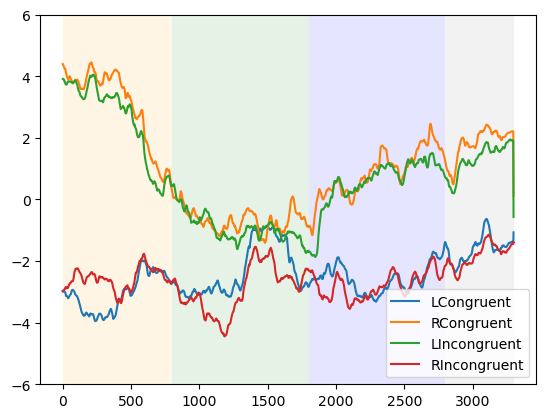

In [54]:
# Plotting the averages for the 'conditioning' blocks
avdfext = dfext.groupby(['Timepoint']).mean().drop('ID',axis=1)

plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
#plt.axvspan(800, 2800, color='green', alpha=0.10, lw=0)
#plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)
plt.axvspan(800, 1800, color='green', alpha=0.10, lw=0)
plt.axvspan(1800, 2800, color='blue', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

ax = plt.gca()
ax.set_ylim([-6, 6])

plt.plot(avdfext['Lcongruent'],label="LCongruent")
plt.plot(avdfext['Rcongruent'],label="RCongruent")
plt.plot(avdfext['Lincongruent'],label="LIncongruent")
plt.plot(avdfext['Rincongruent'],label="RIncongruent")

plt.legend(loc='lower right')
plt.show()

In [55]:
cuedf = dfext.loc[dfext['Timepoint'].between(0,799)].groupby('ID').mean()
cuedf = cuedf.add_suffix('_cue').drop('Timepoint_cue',axis=1)

waitdf1 = dfext.loc[dfext['Timepoint'].between(800,1799)].groupby('ID').mean()
waitdf1 = waitdf1.add_suffix('_wait1').drop('Timepoint_wait1',axis=1)

waitdf2 = dfext.loc[dfext['Timepoint'].between(1800,2799)].groupby('ID').mean()
waitdf2 = waitdf2.add_suffix('_wait2').drop('Timepoint_wait2',axis=1)

rockdf = dfext.loc[dfext['Timepoint'].between(2800,3299)].groupby('ID').mean()
rockdf = rockdf.add_suffix('_rock').drop('Timepoint_rock',axis=1)

grandavdf = pd.concat([cuedf, waitdf1, waitdf2, rockdf],axis=1)

In [56]:
grandavdf

,Lcongruent_cue,Rcongruent_cue,Lincongruent_cue,Rincongruent_cue,Lcongruent_wait1,Rcongruent_wait1,Lincongruent_wait1,Rincongruent_wait1,Lcongruent_wait2,Rcongruent_wait2,Lincongruent_wait2,Rincongruent_wait2,Lcongruent_rock,Rcongruent_rock,Lincongruent_rock,Rincongruent_rock
ID,,,,,,,,,,,,,,,,
2,5.984297,38.365811,38.752618,10.158249,7.362086,25.673444,27.489831,7.883794,8.206738,29.100531,26.741356,8.141231,9.554440,27.746121,28.331461,9.578491
3,-10.859345,-11.655236,-11.218473,-8.058453,-8.444334,-7.632274,-8.881194,-8.188662,-6.420610,-5.903123,-7.150728,-7.315865,-8.632225,-7.187295,-9.657731,-7.881783
4,-3.879907,3.175902,4.042920,-5.498105,0.971800,2.635151,3.003481,-0.888003,-2.551602,2.654136,1.624505,-3.706827,-4.184959,1.604003,1.378724,-4.764610
5,1.615837,4.040924,0.983005,7.078212,10.309822,-6.457350,-1.629354,7.595471,12.509432,-6.521632,-1.932430,10.426625,12.842844,0.194119,0.942781,10.085495
6,4.277252,0.160969,-0.209869,4.869845,5.063093,1.771530,2.372761,4.200980,4.422986,1.506632,1.464833,6.207647,4.049475,-1.982790,1.110976,4.794673
8,-30.742450,6.512346,8.156102,-22.544306,-20.314753,8.099555,9.810444,-19.045039,-24.137755,12.781852,15.940204,-25.188956,-26.874990,13.130230,14.002025,-26.914748
9,-20.759431,6.379504,6.258160,-21.051254,-24.516264,-0.700937,-1.240604,-24.408693,-21.289732,1.276617,-1.495960,-21.505522,-20.112832,0.407088,-2.291586,-19.972595
10,28.435260,35.780489,33.157976,29.396206,27.409985,26.449219,24.265269,25.540726,28.488113,28.144297,27.019514,26.626238,26.864488,23.999206,25.957404,24.231856
11,26.250836,12.697383,12.337700,23.743950,25.937887,12.905488,10.178997,23.792717,26.593254,13.833239,12.359317,24.417663,24.676130,16.598721,14.594305,23.252534


In [59]:
## Saving this for later

#grandavdf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterExt.csv')
grandavdf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDir_Extinctionsides.csv')

# Making it long format

In [60]:
grandavdfL = grandavdf.melt(ignore_index=False)

grandavdfL.rename({'variable':'Condition', 'value':'Diameter'}, axis=1, inplace=True)

grandavdfL[['Condition', 'Phase']] = grandavdfL["Condition"].apply(lambda x: pd.Series(str(x).split("_")))

## Saving this for later

grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDir_ExtinctionsidesLong.csv')
#grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameter_ExtinctionsidesLong.csv')